<h3>📦 Importing Required Libraries</h3>

<ul>
  <li><b>pandas</b>: For data manipulation (e.g., loading and analyzing data).</li>
  <li><b>matplotlib.pyplot</b>: To plot loss and accuracy graphs.</li>
  <li><b>torch</b> & <b>torch.nn</b>: PyTorch for building and training neural networks.</li>
  <li><b>torch.nn.functional</b>: For useful functions (e.g., activation, similarity, one-hot encoding).</li>
  <li><b>sklearn.datasets</b>: Provides ready-to-use datasets for training/testing.</li>
</ul>

<p><b>Example:</b></p>

<pre>
from sklearn.datasets import load_iris
data = load_iris()
print(data['target_names'])  # ['setosa' 'versicolor' 'virginica']
</pre>


In [1]:
import pandas as pd                         # Pandas for data manipulation
import matplotlib.pyplot as plt             # To plot the training and testing graphs of losses and accuracies
from torch import nn                        # For designing the neural network architecture
import torch                                # PyTorch library
from sklearn import datasets                # For using pre-available datasets
from torch.nn import functional as F        # For using already defined functions like dot-product, cross-product, one-hot-encoding, cosine similarity etc

<hr>
<h3>🌸 Loading and Preparing the Iris Dataset</h3>

<ul>
  <li><b>datasets.load_iris()</b>: Loads the famous Iris flower dataset.</li>
  <li><b>X</b>: Stores the features (sepal and petal measurements).</li>
  <li><b>Y</b>: Stores the target labels (flower species).</li>
  <li><b>pd.concat()</b>: Combines features and labels into one dataset.</li>
  <li><b>dataset.columns</b>: Renames the columns for better readability.</li>
  <li><b>dataset</b>: Displays the complete dataset.</li>
</ul>

<p><b>Example rows:</b></p>

<pre>
   sepal_length  sepal_width  petal_length  petal_width  target
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
</pre>

In [2]:
iris = datasets.load_iris()                                                                     # Load iris dataset from the pre-available repository
X = pd.DataFrame(iris.data)                                                                     # Separating features from the dataset
Y = pd.DataFrame(iris.target)                                                                   # Separating targets from the dataset
dataset = pd.concat([X, Y], axis=1)                                                             # Concatenating both the features and targets into one dataset
dataset.columns = ["sepal_length","sepal_width","petal_length","petal_width","target"]          # Giving names to the columns of the dataset

dataset                                                                                         # Displaying the dataset

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


<hr>
<h3>🧪 Splitting the Dataset into Train and Test Sets</h3>

<ul>
  <li><b>dataset.sample(frac=0.8)</b>: Randomly selects 80% of the data for training.</li>
  <li><b>random_state=200</b>: Ensures reproducibility (same split every time).</li>
  <li><b>dataset.drop(train_set.index)</b>: Gets the remaining 20% as the test set.</li>
  <li><b>train_set.shape</b>: Shows the number of rows and columns in the training set.</li>
</ul>

<p><b>Example:</b></p>

<pre>
train_set.shape
# Output: (120, 5)
</pre>

In [3]:
train_set = dataset.sample(frac=0.8, random_state=200)          # Selecting 80% random training examples with labels as train_set from the dataset
test_set = dataset.drop(train_set.index)                        # Selecting rest of the 20% samples from the dataset by removing the already selected, as test_set

train_set.shape                                                 # Display the shape/dimensions of the train_set

(120, 5)

<hr>
<h3>🔁 Converting DataFrames to Tensors</h3>

<ul>
  <li><b>train_x</b>: First 4 columns (features) from train set, converted to float tensor.</li>
  <li><b>train_y</b>: Target column from train set, converted to float tensor.</li>
  <li><b>test_x</b>: First 4 columns (features) from test set, converted to float tensor.</li>
  <li><b>test_y</b>: Target column from test set, converted to float tensor.</li>
  <li><b>train_x.shape, train_y.shape</b>: Shows number of samples and features/labels.</li>
</ul>

<p><b>Example:</b></p>

<pre>
train_x.shape  # torch.Size([120, 4])
train_y.shape  # torch.Size([120, 1])
</pre>

In [4]:
train_x = torch.from_numpy(train_set[["sepal_length","sepal_width","petal_length","petal_width"]].values).float()   # Selecting the first four features and converting it to tensor
train_y = torch.from_numpy(train_set[["target"]].values).float()                                                    # Selecting the last column, label/targets, converting it to tensor
test_x = torch.from_numpy(test_set[["sepal_length","sepal_width","petal_length","petal_width"]].values).float()     # Selecting the first four features and converting it to tensor
test_y = torch.from_numpy(test_set[["target"]].values).float()                                                      # Selecting the last column, label/targets, converting it to tensor

train_x.shape, train_y.shape                                                                                        # Displaying the shape/dimensions of the train_set (features and targets)

(torch.Size([120, 4]), torch.Size([120, 1]))

<hr>
<h3>🧠 Defining a Custom Neural Network</h3>

<ul>
  <li><b>MyNN(nn.Module)</b>: Custom neural network class inheriting from <code>nn.Module</code>.</li>
  <li><b>__init__()</b>: Defines the architecture (layers and activations).</li>
  <li><b>forward()</b>: Describes how input flows through the layers.</li>
</ul>

<p><b>Architecture:</b></p>
<ul>
  <li><b>Input Layer:</b> 4 → 3 neurons</li>
  <li><b>ReLU Activation</b></li>
  <li><b>Hidden Layer:</b> 3 → 2 neurons</li>
  <li><b>ReLU Activation</b></li>
  <li><b>Output Layer:</b> 2 → 3 neurons</li>
</ul>

<p><b>Example:</b></p>

<pre>
model = MyNN()
print(model)
</pre>

In [5]:
class MyNN(nn.Module):                              # Inherit nn.Module class into your own architecture class

    def __init__(self):                             # Constructor of your custom class
        super(MyNN, self).__init__()                # Calling constructor of the super/parent class
        self.input_layer = nn.Linear(4, 3)          # 4 input and 3 output neurons
        self.activation_1 = nn.ReLU()               # 3 input and 3 output values
        self.hidden_layer = nn.Linear(3, 2)         # 3 input and 2 output neurons
        self.activation_2 = nn.ReLU()               # 2 input and 2 output values
        self.output_layer = nn.Linear(2, 3)         # 2 input and 3 output neurons
    
    def forward(self, features):
        features = self.input_layer(features)       # Passing values from the input_layer (4x3)
        features = self.activation_1(features)      # Passing values from the activation
        features = self.hidden_layer(features)      # Passing values from the hidden_layer (3x2)
        features = self.activation_2(features)      # Passing values from the activation
        features = self.output_layer(features)      # Passing values from the output_layer (2x3)
        return features                             # Return the final values   (3x1)

<hr>
<h3>🔢 One-Hot Encoding the Labels</h3>

<ul>
  <li><b>F.one_hot()</b>: Converts class labels into one-hot encoded vectors.</li>
  <li><b>squeeze()</b>: Removes extra dimensions (e.g., [120,1] → [120]).</li>
  <li><b>long()</b>: Ensures labels are in integer format for encoding.</li>
  <li><b>test_y_one_hot</b>: Displays the encoded vectors (e.g., class 2 → [0, 0, 1]).</li>
</ul>

<p><b>Example:</b></p>

<pre>
Label: 1 → One-hot: [0, 1, 0]
Label: 2 → One-hot: [0, 0, 1]
</pre>

In [6]:
train_y_one_hot = F.one_hot(train_y.squeeze().long())   # One-Hot-Encoding of the train labels
test_y_one_hot = F.one_hot(test_y.squeeze().long())     # One-Hot-Encoding of the test labels

test_y_one_hot                                          # Displaying the one-hot-encoded vectors 

tensor([[1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1]])

<hr>
<h3>⚙️ Model Setup: Loss, Optimizer, and Training Config</h3>

<ul>
  <li><b>model = MyNN()</b>: Creates an instance of the neural network.</li>
  <li><b>nn.CrossEntropyLoss()</b>: Loss function for multi-class classification.</li>
  <li><b>torch.optim.SGD()</b>: Optimizer that updates weights using Stochastic Gradient Descent.</li>
  <li><b>lr=0.01</b>: Learning rate — controls how fast the model learns.</li>
  <li><b>losses = []</b>: To store loss values for each epoch.</li>
  <li><b>epochs = 20000</b>: Number of full passes through the training data.</li>
</ul>

<p><b>Example:</b></p>

<pre>
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
</pre>

In [7]:
model = MyNN()                                              # Creating an actual object/instance of our architecture/model class
criterion = nn.CrossEntropyLoss()                           # The loss function used in classification problem
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)    # Used for updating model's weights with a specified learning rate
losses = []                                                 # We will use this list to store our losses at each epoch for plotting later
epochs = 5000                                              # Number of epochs

<hr>
<h3>🔁 Training the Neural Network</h3>

<ul>
  <li><b>for epoch in range(epochs)</b>: Loop runs for 20,000 iterations.</li>
  <li><b>model(train_x)</b>: Performs forward pass to get predictions.</li>
  <li><b>criterion(...)</b>: Calculates loss between predictions and actual labels.</li>
  <li><b>losses.append()</b>: Saves the loss value for plotting later.</li>
  <li><b>loss.backward()</b>: Computes gradients via backpropagation.</li>
  <li><b>optimizer.step()</b>: Updates weights using the gradients.</li>
  <li><b>optimizer.zero_grad()</b>: Clears old gradients before next backward pass.</li>
  <li><b>if epoch % 500 == 0</b>: Prints progress every 500 epochs.</li>
</ul>

<p><b>Example Output:</b></p>

<pre>
Epoch [5001/20000]: Loss = 0.4212
</pre>


In [8]:
for epoch in range(epochs):                                     # Runs for 'epochs' times
    output = model(train_x)                                     # Forward passing the training data from our model and obtaining an output
    loss = criterion(output, train_y_one_hot.float())           # Calculating loss of our predicted output and the actual output
    losses.append(loss.item())                                  # Saving the plain values (removing, tensor([5]) = 5) in the losses list
    loss.backward()                                             # Doing a back propagation on the model/architecture/network/pipeline to obtain gradients
    optimizer.step()                                            # Based on the gradients calculated by the backward(), update weights
    optimizer.zero_grad()                                       # Zero the gradients of the current/old epoch/weights, so that we can get new/fresh gradients for the newly updated weights
    
    if epoch % 250 == 0:                                        # After every 500 epochs
        print(f"Epoch [{epoch}/{epochs}]: Loss = {loss}")     # Display these information

Epoch [0/5000]: Loss = 1.2278720140457153
Epoch [250/5000]: Loss = 0.8454306125640869
Epoch [500/5000]: Loss = 0.6192030310630798
Epoch [750/5000]: Loss = 0.5405597686767578
Epoch [1000/5000]: Loss = 0.4911028742790222
Epoch [1250/5000]: Loss = 0.45280784368515015
Epoch [1500/5000]: Loss = 0.41873326897621155
Epoch [1750/5000]: Loss = 0.3871346414089203
Epoch [2000/5000]: Loss = 0.3580208420753479
Epoch [2250/5000]: Loss = 0.3318772614002228
Epoch [2500/5000]: Loss = 0.3088952898979187
Epoch [2750/5000]: Loss = 0.28890666365623474
Epoch [3000/5000]: Loss = 0.2715500593185425
Epoch [3250/5000]: Loss = 0.2564157247543335
Epoch [3500/5000]: Loss = 0.24315986037254333
Epoch [3750/5000]: Loss = 0.23142336308956146
Epoch [4000/5000]: Loss = 0.22094210982322693
Epoch [4250/5000]: Loss = 0.21150735020637512
Epoch [4500/5000]: Loss = 0.20295362174510956
Epoch [4750/5000]: Loss = 0.19514983892440796


<hr>
<h3>📉 Visualizing the Training Loss</h3>

<ul>
  <li><b>plt.plot(losses)</b>: Plots the loss values recorded over epochs.</li>
  <li><b>plt.show()</b>: Displays the loss graph.</li>
</ul>

<p><b>Purpose:</b> Helps track how well the model is learning over time.</p>

<p><b>Example Output:</b></p>

<pre>
A line graph showing loss decreasing as training progresses.
</pre>

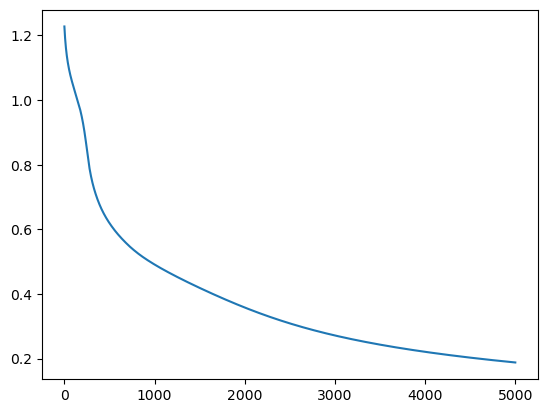

In [9]:
plt.plot(losses)        # Plot the losses to a graph
plt.show()              # Show the final graph

<hr>
<h3>🔍 Making Predictions on Test Data</h3>

<ul>
  <li><b>model(test_x)</b>: Forward pass on test features to get raw outputs.</li>
  <li><b>torch.max(out.data, 1)</b>: Selects the class with the highest score as prediction.</li>
  <li><b>predicted</b>: Stores predicted class labels.</li>
  <li>Prints predicted and actual labels side-by-side for comparison.</li>
</ul>

<p><b>Example Output:</b></p>

<pre>
Predicted: tensor([0, 2, 1, ...])
Actual   : tensor([0, 2, 1, ...])
</pre>

In [10]:
out = model(test_x)                         # Doing a forward pass on the test features
_, predicted = torch.max(out.data, 1)       # Obtaining the predicted values
print("Predicted: ", predicted)             # Showing the predicted values for user's reference
print("Actual   : ", test_y.squeeze())      # Showing the actual values for user's reference

Predicted:  tensor([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])
Actual   :  tensor([0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])


<hr>
<h3>✅ Calculating Accuracy on Test Set</h3>

<ul>
  <li><b>correct</b>: Counts how many predictions match the actual labels.</li>
  <li><b>total</b>: Total number of test samples.</li>
  <li>Loop checks each predicted label against the actual label.</li>
  <li>Prints the accuracy as a percentage.</li>
</ul>

<p><b>Example Output:</b></p>

<pre>
Accuracy of the network on the 30 test images: 93.33%
</pre>

In [11]:
correct = 0                                                                                 # Setting correct for saving the number of correct predictions                                 
total = len(predicted)                                                                      # Saving the total number of predictions
for i in range(total):                                                                      # Looping based on the total number
    if predicted[i] == test_y[i]:                                                           # If the labels are equal
        correct += 1                                                                        #   -> Increase the correct by +1
print(f"Accuracy of the network on the 30 test images: {100 * correct / total}%")           # Show the final accuracy in percentage format

Accuracy of the network on the 30 test images: 90.0%


<hr>
<h3>🔮 Predicting a Single Sample</h3>

<ul>
  <li><b>x</b>: Sample feature values (sepal length, width, petal length, width).</li>
  <li><b>torch.tensor(x)</b>: Converts list to tensor for model input.</li>
  <li><b>model(x)</b>: Forward pass to get output scores for each class.</li>
  <li>Higher value in output indicates the predicted class.</li>
</ul>

<p><b>Example Output:</b></p>

<pre>
tensor([2.1, 5.3, 0.7])  # Higher value at index 1 suggests class 1 prediction
</pre>

In [12]:
x = [4.9000, 3.0000, 1.4000, 0.2000]        # Sample values, could be taken from the dataset as well
y = model(torch.tensor(x))                  # Converting the list to tensor and then passing it from the model for forward pass
y                                           # Displaying the values, greater value on a particular neuron meaning that very class

tensor([ 2.6058,  0.3477, -3.3561], grad_fn=<ViewBackward0>)

<h1>The End</h1>